# Code Dojo : Python for Data Analysis

The aim of this notebook is to discover Python for data-science.
To use this notebook, you need first to download the following dataset : [Pokemon- Weedle's Cave](https://www.kaggle.com/terminus7/pokemon-challenge)

Inspired by the : [data sciencetutorial for beginners](https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners)

### import usefull librairies for data manipulation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from math import pi


### check content of the folder

In [2]:
from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

combats.csv
pokemon.csv
tests.csv



In [3]:
data_pokemon = pd.read_csv('../data/pokemon.csv')

In [4]:
# list the columns
data_pokemon.columns.tolist()

['#',
 'Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [5]:
data_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
data_pokemon.shape

(800, 12)

In [7]:
print("Dataframe 1: pokemon.csv")
pd.options.display.max_columns = None
pd.options.display.max_rows = 20
display(data_pokemon)
#data_pokemon.head(10) 
#data_pokemon.tail(10)

Dataframe 1: pokemon.csv


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [8]:
#have a look to summary of the data
data_pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
data_pokemon.drop(['#','Generation'],axis=1).head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [10]:
pd.value_counts(data_pokemon['Type 1'])

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

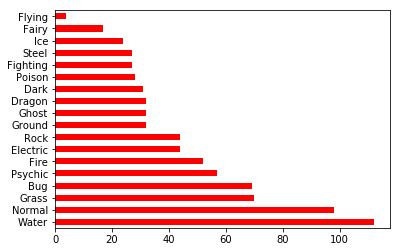

In [11]:
pd.value_counts(data_pokemon['Type 1']).plot(kind='barh', color='r')

In [12]:
data_pokemon['HP'].mean()

69.25875

In [13]:
data_pokemon['HP'].median()

65.0

In [14]:
#data_pokemon.groupby(['Type 1']).mean()
data_pokemon.groupby(['Type 1']).median()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,316.0,60.0,65.0,60.0,50.0,60.0,60.0,3.0,0.0
Dark,569.0,65.0,88.0,70.0,65.0,65.0,70.0,5.0,0.0
Dragon,492.5,80.0,113.5,90.0,105.0,90.0,90.0,4.0,0.0
Electric,449.5,60.0,65.0,65.0,95.0,79.5,88.0,4.0,0.0
Fairy,738.0,78.0,52.0,66.0,75.0,79.0,45.0,6.0,0.0
Fighting,337.0,70.0,100.0,70.0,40.0,63.0,60.0,3.0,0.0
Fire,316.5,70.0,84.5,64.0,85.0,67.5,78.5,3.0,0.0
Flying,747.5,79.0,85.0,75.0,103.5,80.0,116.0,5.5,0.5
Ghost,545.5,59.5,66.0,72.5,65.0,75.0,60.5,4.0,0.0


In [15]:
data_pokemon.groupby(['Type 1','Type 2']).mean()

#         HP      Attack     Defense     Sp. Atk  \
Type 1 Type 2                                                                
Bug    Electric  657.500000  60.000000   62.000000   55.000000   77.000000   
       Fighting  232.500000  80.000000  155.000000   95.000000   40.000000   
       Fire      698.500000  70.000000   72.500000   60.000000   92.500000   
       Flying    315.571429  63.000000   70.142857   61.571429   72.857143   
       Ghost     317.000000   1.000000   90.000000   45.000000   30.000000   
...                     ...        ...         ...         ...         ...   
Water  Ice       112.333333  90.000000   83.333333  113.333333   80.000000   
       Poison    129.000000  61.666667   68.333333   58.333333   61.666667   
       Psychic   121.400000  87.000000   73.000000  104.000000   94.000000   
       Rock      474.750000  70.750000   82.750000  112.750000   61.500000   
       Steel     441.000000  84.000000   86.000000   88.000000  111.000000   

                    Sp. Def      Speed  Generation  Legendary  
Type 1 Type 2                                                  
Bug    Electric   55.000000  86.500000    5.000000        0.0  
       Fighting  100.000000  80.000000    2.000000        0.0  
       Fire       80.000000  80.000000    5.000000        0.0  
       Flying     69.071429  82.857143    2.857143        0.0  
       Ghost      30.000000  40.000000    3.000000        0.0  
...                     ...        ...         ...        ...  
Water  Ice        78.333333  66.666667    1.000000        0.0  
       Poison     91.666667  85.000000    1.333333        0.0  
       Psychic    79.000000  44.000000    1.200000        0.0  
       Rock       65.000000  36.000000    3.750000        0.0  
       Steel     101.000000  60.000000    4.000000        0.0  

[136 rows x 9 columns]

In [16]:
dragon = data_pokemon[data_pokemon['Type 1']=="Dragon"]
dragon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
159,160,Dratini,Dragon,NaN,41,64,45,50,50,50,1,False
160,161,Dragonair,Dragon,NaN,61,84,65,70,70,70,1,False
161,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False
365,366,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False
366,367,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
712,713,Kyurem White Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True
774,775,Goomy,Dragon,NaN,45,50,35,55,75,40,6,False
775,776,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,777,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False


In [17]:
water = data_pokemon[data_pokemon['Type 1']=="Water"]
water

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
724,725,Froakie,Water,NaN,41,56,40,62,44,71,6,False
725,726,Frogadier,Water,NaN,54,63,52,83,56,97,6,False
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False
762,763,Clauncher,Water,NaN,50,53,62,58,63,44,6,False


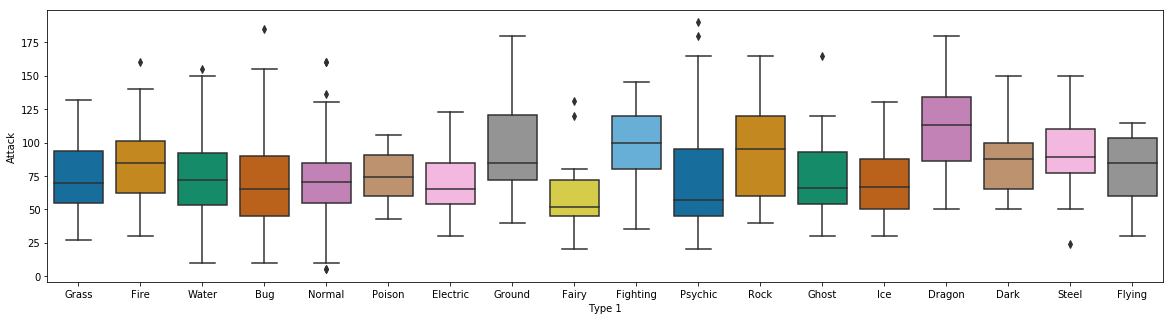

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(y='Attack', x='Type 1', 
                 data=data_pokemon, 
                 palette="colorblind")

In [19]:
data_pokemon['Attack'].max()

190

In [20]:
data_pokemon['Attack'].idxmax()

163

In [21]:
data_pokemon.iloc[data_pokemon['Attack'].idxmax()]

#                       164
Name          Mega Mewtwo X
Type 1              Psychic
Type 2             Fighting
HP                      106
Attack                  190
Defense                 100
Sp. Atk                 154
Sp. Def                 100
Speed                   130
Generation                1
Legendary              True
Name: 163, dtype: object

In [22]:
# filter pokemon who doesn t have at least 160 in Attack
data_pokemon[(data_pokemon['Attack']>160)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
232,233,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
268,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False
387,388,Mega Banette,Ghost,NaN,64,165,75,93,83,75,3,False
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True
454,455,Rampardos,Rock,NaN,97,165,60,65,50,58,4,False
494,495,Mega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,False
527,528,Mega Gallade,Psychic,Fighting,68,165,95,65,115,110,4,False


In [23]:
# filter pokemon who doesn t have at least 200 in Defense and 100 in Attack
data_pokemon[(data_pokemon['Defense']>200) & (data_pokemon['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [24]:
data_pokemon[(data_pokemon['Defense']>200) | (data_pokemon['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
793,794,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [25]:
# Firstly lets create 2 data frame and concatenate them
data1 = data_pokemon.head()
data2= data_pokemon.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


## We keep only the pokemon that have a good attack

In [26]:
#best_attack_pokemon = data_pokemon[data_pokemon['Attack']>data_pokemon['Attack'].median()]
best_attack_pokemon = data_pokemon[data_pokemon['Attack']>data_pokemon['Attack'].quantile(.75)]
best_attack_pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
793,794,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [27]:
best_attack_pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,438.823529,84.582353,126.888235,91.523529,90.141176,81.541176,82.382353,3.464706
std,221.751083,20.711793,19.445399,30.606725,38.410629,23.217547,28.425981,1.595645
min,8.000000,30.000000,102.000000,20.000000,15.000000,20.000000,20.000000,1.000000
25%,265.000000,70.000000,110.000000,70.000000,60.000000,65.000000,60.250000,2.000000
50%,441.000000,80.000000,123.000000,90.000000,84.000000,80.000000,85.000000,4.000000
75%,627.750000,100.000000,135.000000,105.000000,120.000000,97.500000,100.000000,5.000000
max,800.000000,160.000000,190.000000,230.000000,194.000000,160.000000,150.000000,6.000000


## Do the same exercice on Speed / HP / Defense

In [28]:
#best_speed_pokemon = data_pokemon[data_pokemon['Speed']>data_pokemon['Speed'].median()]
#best_HP_pokemon = data_pokemon[data_pokemon['HP']>data_pokemon['HP'].median()]
#best_defense_pokemon = data_pokemon[data_pokemon['Defense']>data_pokemon['Defense'].median()]
best_speed_pokemon = data_pokemon[data_pokemon['Speed']>data_pokemon['Speed'].quantile(.75)]
best_HP_pokemon = data_pokemon[data_pokemon['HP']>data_pokemon['HP'].quantile(.75)]
best_defense_pokemon = data_pokemon[data_pokemon['Defense']>data_pokemon['Defense'].quantile(.75)]

## Data manipulation

In [29]:
best_speed_attack = pd.merge(best_attack_pokemon, best_speed_pokemon, how='inner', on=best_attack_pokemon.columns.tolist())
best_speed_attack

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
1,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
2,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
3,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
4,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
65,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False
66,718,Genesect,Bug,Steel,71,120,95,120,95,99,5,False
67,793,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
68,794,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True


In [30]:
#best_speed_attack_defense = pd.merge(best_speed_attack, best_defense_pokemon, how='inner', on=['#'])
best_speed_attack_defense = pd.merge(best_speed_attack, best_defense_pokemon, how='inner', on=best_speed_attack.columns.tolist())
best_speed_attack_defense

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
1,125,Mega Kangaskhan,Normal,NaN,105,125,100,60,100,100,1,False
2,138,Mega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False
3,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
4,314,Slaking,Normal,NaN,150,160,100,95,65,100,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18,712,Kyurem Black Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True
19,718,Genesect,Bug,Steel,71,120,95,120,95,99,5,False
20,793,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
21,794,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True


In [31]:
best_speed_attack_defense_HP = pd.merge(best_speed_attack_defense, best_HP_pokemon, how='inner', on=best_speed_attack_defense.columns.tolist())
best_speed_attack_defense_HP

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,125,Mega Kangaskhan,Normal,NaN,105,125,100,60,100,100,1,False
1,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
2,314,Slaking,Normal,NaN,150,160,100,95,65,100,3,False
3,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False
4,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
5,494,Garchomp,Dragon,Ground,108,130,95,80,85,102,4,False
6,495,Mega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,False
7,542,Palkia,Water,Dragon,90,120,100,150,120,100,4,True
8,544,Regigigas,Normal,NaN,110,160,110,80,110,100,4,True
9,553,Arceus,Normal,NaN,120,120,120,120,120,120,4,True


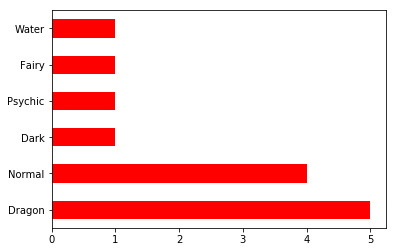

In [32]:
pd.value_counts(best_speed_attack_defense_HP['Type 1']).plot(kind='barh', color='r')

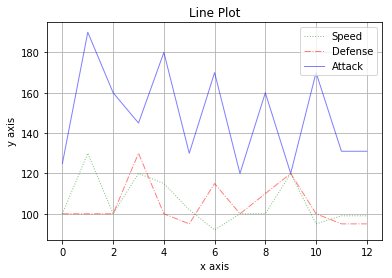

In [33]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
best_speed_attack_defense_HP.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
best_speed_attack_defense_HP.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
best_speed_attack_defense_HP.Attack.plot(color = 'b',label = 'Attack',linewidth=1, alpha = 0.5,grid = True,linestyle = '-')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

In [34]:
#search for correlations
data_pokemon.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


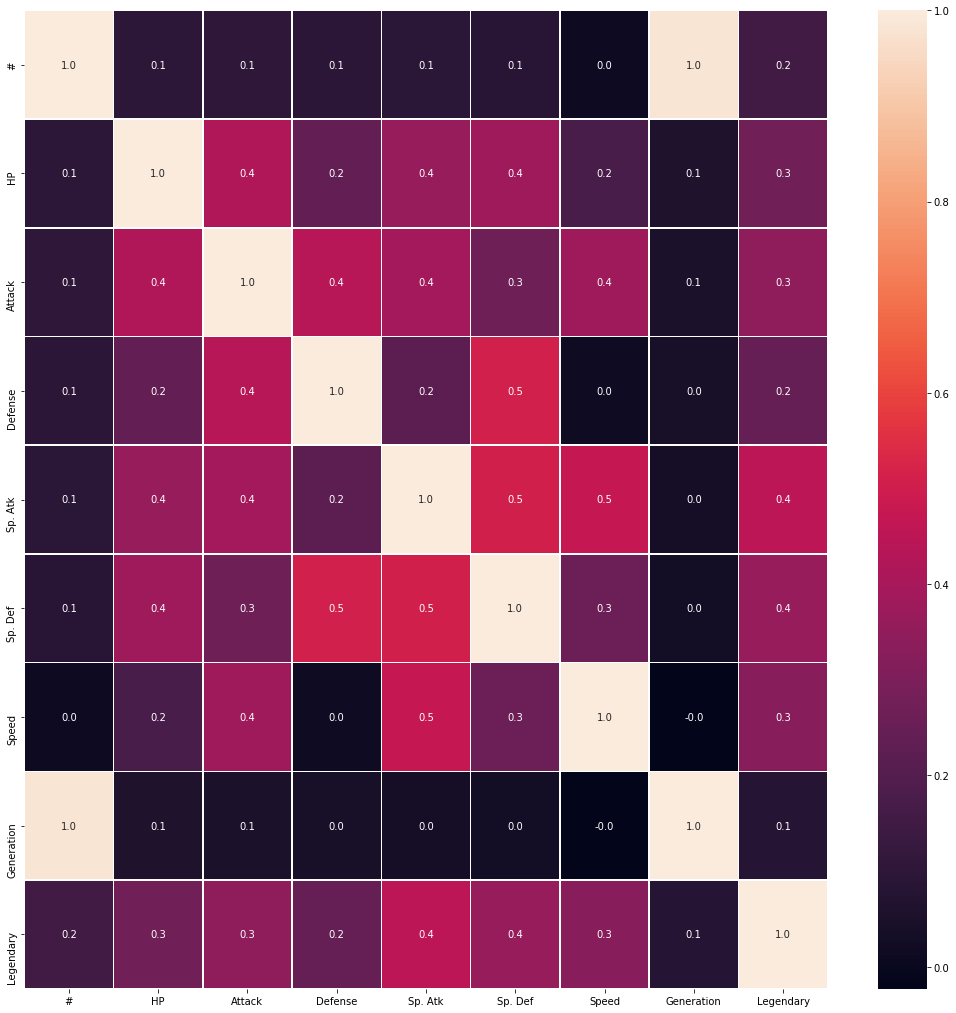

In [35]:
#search for correlations on a graphical way
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_pokemon.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Check Result on several pokemons

'Skills of : Bulbasaur'

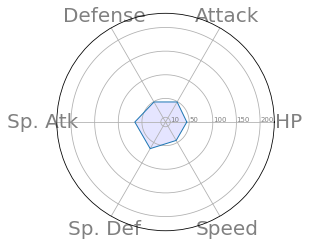

In [36]:
# number of variable
categories=list(data_pokemon)[4:10]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=data_pokemon.iloc[:, 4:10].loc[0].values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=20)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,50,100,150,200], ["10","50","100","150","200"], color="grey", size=7)
plt.ylim(0,230)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

f'Skills of : {data_pokemon["Name"].iloc[0]}'

'Skills of : Mega Mewtwo X'

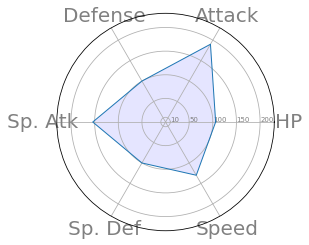

In [37]:
# number of variable
categories=list(data_pokemon)[4:10]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=data_pokemon.iloc[:, 4:10].iloc[data_pokemon['Attack'].idxmax()].values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=20)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,50,100,150,200], ["10","50","100","150","200"], color="grey", size=7)
plt.ylim(0,230)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

f'Skills of : {data_pokemon["Name"].iloc[data_pokemon["Attack"].idxmax()]}'

'Skills of : Blissey'

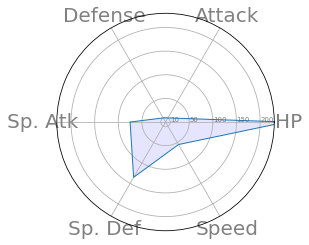

In [38]:
# number of variable
categories=list(data_pokemon)[4:10]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=data_pokemon.iloc[:, 4:10].iloc[data_pokemon['HP'].idxmax()].values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=20)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,50,100,150,200], ["10","50","100","150","200"], color="grey", size=7)
plt.ylim(0,230)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

f'Skills of : {data_pokemon["Name"].iloc[data_pokemon["HP"].idxmax()]}'

'Skills of : Deoxys Speed Forme'

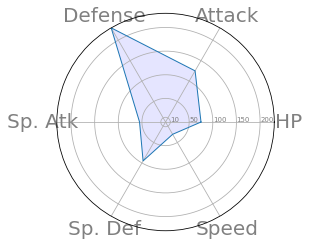

In [39]:
# number of variable
categories=list(data_pokemon)[4:10]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=data_pokemon.iloc[:, 4:10].iloc[data_pokemon['Defense'].idxmax()].values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=20)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,50,100,150,200], ["10","50","100","150","200"], color="grey", size=7)
plt.ylim(0,230)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

f'Skills of : {data_pokemon["Name"].iloc[data_pokemon["Speed"].idxmax()]}'

'Skills of : Deoxys Speed Forme'

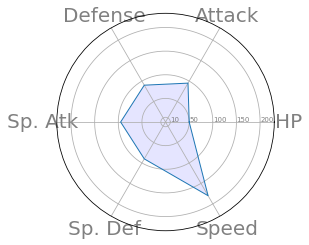

In [40]:
# number of variable
categories=list(data_pokemon)[4:10]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=data_pokemon.iloc[:, 4:10].iloc[data_pokemon['Speed'].idxmax()].values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=20)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,50,100,150,200], ["10","50","100","150","200"], color="grey", size=7)
plt.ylim(0,230)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

f'Skills of : {data_pokemon["Name"].iloc[data_pokemon["Speed"].idxmax()]}'

'Skills of : Mega Mewtwo Y'

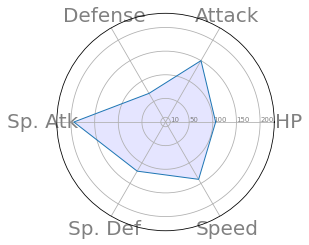

In [41]:
# number of variable
categories=list(data_pokemon)[4:10]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=data_pokemon.iloc[:, 4:10].iloc[164].values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=20)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,50,100,150,200], ["10","50","100","150","200"], color="grey", size=7)
plt.ylim(0,230)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

f'Skills of : {data_pokemon["Name"].iloc[164]}'